# Group API Project
Crime vs. Unemployment Rates

What, if any, relationship is there between national property crimes rates versus unemployment rates from 2010 to 2020?

Is there a noticeable difference between the years? Is there a potential correlation between crime and unemployment rates? Is there a stronger correlation in one subgroup of property crimes than the others?

In [81]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from pprint import pprint
import citipy
import json
from citipy import citipy
import seaborn as sns
import prettytable

import API_Keys

from API_Keys import FBI_api_key, BLS_api_key

## Performing the API Calls and Collecting the Data

In [82]:
#FBI JSON request
#base_url: https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/{burglary}/offense/national/{count}
headers = {"Incident": "incident_count", "Offense": "offense_count", "Year": "data_year"}

#burglary, count
fbi_burglary_ct = requests.get('https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/burglary-breaking-and-entering/offense/national/count/?limit=1&api_key=HXzuNSaaIO46x38N0iVVKpMDgrP6GG3mxBcacgRH', data=data, headers=headers)
fbi_json_bur_ct = json.loads(fbi_burglary_ct.text)

In [83]:
#cleaning and reformatting the burglary data
raw_fbi_bur_ct = []
raw_fbi_bur_ct.append(fbi_json_bur_ct)
fbi_unformed_bur_ct = pd.json_normalize(raw_fbi_bur_ct, record_path = ["results"])
fbi_unformed_bur_ct.to_csv('fbi_unformed_bur_ct_csv.csv')

In [84]:
# creating a burglary DataFrame
#creating dataframe
burg_df = pd.DataFrame(fbi_json_bur_ct['results'])

# sorting by year 
burg_sorted=burg_df.sort_values(by='data_year')

# filtering for 2011-2020
burg_yr_filtered = burg_sorted.loc[burg_sorted['data_year'] >= 2011]
pd.DataFrame(burg_yr_filtered)

,incident_count,offense_count,data_year
11,585312,585312,2011
0,586634,586634,2012
29,537536,537536,2013
22,482371,482371,2014
21,462537,462537,2015
9,462509,462509,2016
1,441958,441958,2017
28,434631,434631,2018
19,494159,494159,2019
18,522426,522426,2020


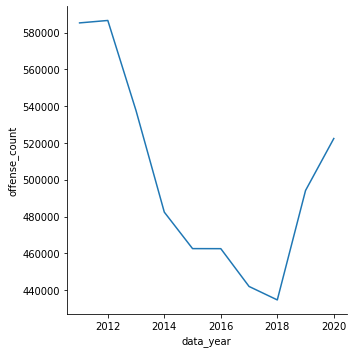

In [85]:
# creating a burglary line plot
sns.relplot(x='data_year', y='offense_count', data=burg_yr_filtered, kind='line')

In [86]:
#robbery, count
fbi_robbery_ct = requests.get('https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/robbery/offense/national/count/?limit=1&api_key=HXzuNSaaIO46x38N0iVVKpMDgrP6GG3mxBcacgRH')
fbi_json_robbery_ct = json.loads(fbi_robbery_ct.text)


In [87]:
#cleaning and reformatting the robbery data
raw_fbi_robbery_ct = []
raw_fbi_robbery_ct.append(fbi_json_robbery_ct)
fbi_unformed_robbery_ct = pd.json_normalize(raw_fbi_robbery_ct, record_path = ["results"])
fbi_unformed_robbery_ct.to_csv('fbi_unformed_robbery_ct_csv.csv')

In [88]:
# creating a robbery DataFrame
#creating dataframe
robb_df = pd.DataFrame(fbi_json_robbery_ct['results'])

# sorting by year 
robb_sorted=robb_df.sort_values(by='data_year')

# filtering for 2011-2020
robb_yr_filtered = robb_sorted.loc[robb_sorted['data_year'] >= 2011]
pd.DataFrame(robb_yr_filtered)

,incident_count,offense_count,data_year
15,72942,72942,2011
3,74626,74626,2012
26,72200,72200,2013
23,68471,68471,2014
25,70713,70713,2015
10,73328,73328,2016
4,72311,72311,2017
28,78559,78559,2018
19,95627,95627,2019
20,102677,102677,2020


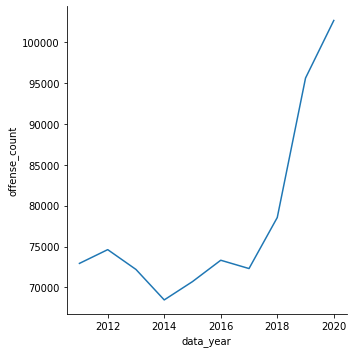

In [89]:
# creating a robbery line plot
sns.relplot(x='data_year', y='offense_count', data=robb_yr_filtered, kind='line')

In [90]:
#larceny, count
fbi_larceny_ct = requests.get('https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/larceny-theft-offenses/offense/national/count/?limit=1&api_key=HXzuNSaaIO46x38N0iVVKpMDgrP6GG3mxBcacgRH')
fbi_json_larceny_ct = json.loads(fbi_larceny_ct.text)


In [91]:
#cleaning and reformatting the larceny data
raw_fbi_larceny_ct = []
raw_fbi_larceny_ct.append(fbi_json_larceny_ct)
fbi_unformed_larceny_ct = pd.json_normalize(raw_fbi_larceny_ct, record_path = ["results"])
fbi_unformed_larceny_ct.to_csv('fbi_unformed_larceny_ct_csv.csv')

In [92]:
# creating a larceny DataFrame
#creating dataframe
larc_df = pd.DataFrame(fbi_json_larceny_ct['results'])

# sorting by year 
larc_sorted=larc_df.sort_values(by='data_year')

# filtering for 2011-2020
larc_yr_filtered = larc_sorted.loc[larc_sorted['data_year'] >= 2011]
pd.DataFrame(larc_yr_filtered)

# sum offense counts by year
larc_by_year=larc_yr_filtered.groupby('data_year').sum('offense_count')
pd.DataFrame(larc_by_year)

,incident_count,offense_count
data_year,,
2011,1715009,1715009
2012,1792213,1792213
2013,1760951,1760951
2014,1722483,1722483
2015,1741204,1741204
2016,1789788,1789788
2017,1816210,1816210
2018,1902857,1902857
2019,2271350,2271350


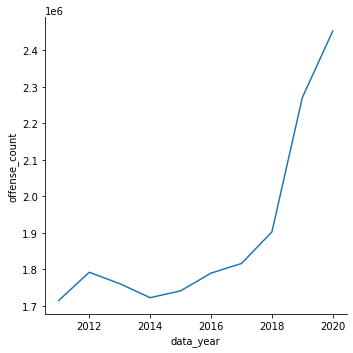

In [93]:
# creating a larceny line plot
sns.relplot(x='data_year', y='offense_count', data=larc_by_year, kind='line')

In [94]:
#stolen property, offense count
fbi_stolprop_ct = requests.get('https://api.usa.gov/crime/fbi/sapi/api/data/nibrs/stolen-property-offenses/offense/national/count/?limit=1&api_key=HXzuNSaaIO46x38N0iVVKpMDgrP6GG3mxBcacgRH')
fbi_json_stolprop_ct = json.loads(fbi_stolprop_ct.text)
print(fbi_json_stolprop_ct)


{'results': [{'incident_count': 29977, 'offense_count': 29977, 'data_year': 2008}, {'incident_count': 32951, 'offense_count': 32951, 'data_year': 2011}, {'incident_count': 21697, 'offense_count': 21697, 'data_year': 2003}, {'incident_count': 30547, 'offense_count': 30547, 'data_year': 2006}, {'incident_count': 30736, 'offense_count': 30736, 'data_year': 2009}, {'incident_count': 2230, 'offense_count': 2230, 'data_year': 1994}, {'incident_count': 45781, 'offense_count': 45781, 'data_year': 2016}, {'incident_count': 20097, 'offense_count': 20097, 'data_year': 2002}, {'incident_count': 31740, 'offense_count': 31740, 'data_year': 2005}, {'incident_count': 8128, 'offense_count': 8128, 'data_year': 1997}, {'incident_count': 10916, 'offense_count': 10916, 'data_year': 1998}, {'incident_count': 49301, 'offense_count': 49301, 'data_year': 2017}, {'incident_count': 36594, 'offense_count': 36594, 'data_year': 2012}, {'incident_count': 14906, 'offense_count': 14906, 'data_year': 2000}, {'incident_

In [95]:
#cleaning and reformatting the stolen property data
raw_fbi_stolprop_ct = []
raw_fbi_stolprop_ct.append(fbi_json_stolprop_ct)
fbi_unformed_stolprop_ct = pd.json_normalize(raw_fbi_stolprop_ct, record_path = ["results"])
fbi_unformed_stolprop_ct.to_csv('fbi_unformed_stolptop_ct_csv.csv')

In [101]:
# creating a stolen property DataFrame
#creating dataframe
stolprop_df = pd.DataFrame(fbi_json_stolprop_ct['results'])

# sorting by year 
stolprop_sorted=stolprop_df.sort_values(by='data_year')

# filtering for 2011-2020
stolprop_yr_filtered = stolprop_sorted.loc[stolprop_sorted['data_year'] >= 2011]
pd.DataFrame(stolprop_yr_filtered)

# sum offense counts by year
stolprop_by_year=stolprop_yr_filtered.groupby('data_year').sum('offense_count')
pd.DataFrame(stolprop_by_year)

,incident_count,offense_count
data_year,,
2011,32951,32951
2012,36594,36594
2013,37367,37367
2014,37273,37273
2015,39088,39088
2016,45781,45781
2017,49301,49301
2018,53094,53094
2019,62034,62034


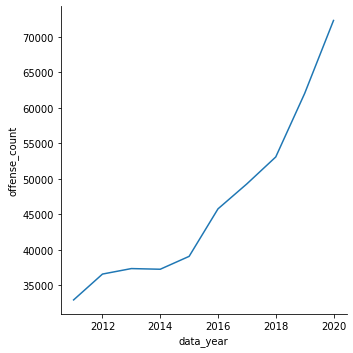

In [102]:
# creating a stolen property line plot
sns.relplot(x='data_year', y='offense_count', data=stolprop_by_year, kind='line')

In [97]:
#BLS JSON request
base_url="https://api.bls.gov/publicAPI/v2/timeseries/data/?registrationkey="+BLS_api_key+"&catalog=false&startyear=2011&endyear=2020&calculations=true&annualaverage=true&aspects=true"


headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['LNS14000000'],"startyear":"2011", "endyear":"2020"})
bls_unemp = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data, headers=headers)
bls_json_data_unemp = json.loads(bls_unemp.text)
for series in bls_json_data_unemp['Results']['series']:
    x=prettytable.PrettyTable(["series id","year","period","value","footnotes"])
    seriesId = series['seriesID']
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes=""
        for footnote in item['footnotes']:
            if footnote:
                footnotes = footnotes + footnote['text'] + ','
        if 'M01' <= period <= 'M12':
            x.add_row([seriesId,year,period,value,footnotes[0:-1]])
    output = open(seriesId + '.txt','w')
    output.write (x.get_string())
    output.close()

In [98]:
print(bls_json_data_unemp)

{'status': 'REQUEST_SUCCEEDED', 'responseTime': 216, 'message': [], 'Results': {'series': [{'seriesID': 'LNS14000000', 'data': [{'year': '2020', 'period': 'M12', 'periodName': 'December', 'value': '6.7', 'footnotes': [{}]}, {'year': '2020', 'period': 'M11', 'periodName': 'November', 'value': '6.7', 'footnotes': [{}]}, {'year': '2020', 'period': 'M10', 'periodName': 'October', 'value': '6.9', 'footnotes': [{}]}, {'year': '2020', 'period': 'M09', 'periodName': 'September', 'value': '7.8', 'footnotes': [{}]}, {'year': '2020', 'period': 'M08', 'periodName': 'August', 'value': '8.4', 'footnotes': [{}]}, {'year': '2020', 'period': 'M07', 'periodName': 'July', 'value': '10.2', 'footnotes': [{}]}, {'year': '2020', 'period': 'M06', 'periodName': 'June', 'value': '11.1', 'footnotes': [{}]}, {'year': '2020', 'period': 'M05', 'periodName': 'May', 'value': '13.3', 'footnotes': [{}]}, {'year': '2020', 'period': 'M04', 'periodName': 'April', 'value': '14.8', 'footnotes': [{}]}, {'year': '2020', 'peri

In [99]:
#creating dataframe
unemp_df=pd.DataFrame(bls_json['Results']['series'][0]['data'])

# convert 'value' column from strings to floats
unemp_df['value'] = unemp_df['value'].astype(float)

#sort by year
unemp_sorted=unemp_df.sort_values(by=['year','period'])
pd.DataFrame(unemp_sorted)

# average unemployment rates by year
unemp_by_year=unemp_sorted.groupby('year').mean('value')
pd.DataFrame(unemp_by_year)

,value
year,
2011,8.933333
2012,8.075000
2013,7.358333
2014,6.158333
2015,5.275000
2016,4.875000
2017,4.350000
2018,3.891667
2019,3.683333


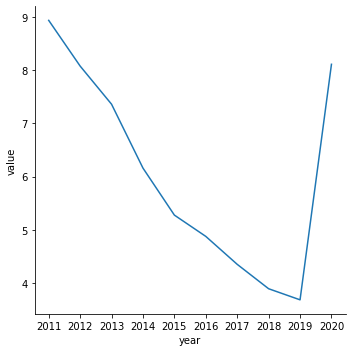

In [100]:
# creating an unemployment line plot
sns.relplot(x='year', y='value', data=unemp_by_year, kind='line')